# Basic Package Mangement

In [1]:
#install.packages("pacman") # Execute this once.
require(pacman)

Loading required package: pacman
Warning message:
"package 'pacman' was built under R version 3.6.3"

### Clearing and unloading packages

In [30]:
# Run this block, when done coding or before starting coding.
p_unload(all)
detach("package:datasets", unload=TRUE)
rm(list=ls()) # removes all previous stored variables

The following packages have been unloaded:
readxl, magrittr, mosaic, ggridges, mosaicData, ggformula, ggstance, Matrix, lattice, forcats, stringr, dplyr, purrr, readr, tidyr, tibble, ggplot2, tidyverse, pacman



### Loading packages

In [2]:
pacman::p_load(pacman, tidyverse, mosaic, magrittr)

# Initializing the dataframe

In [3]:
library("readxl")
df <- read_excel("data/DeathsDK160321.xlsx")
df

interval,age,infected,tested,female_deaths,male_deaths,tot_deaths,comorbidity,infected_fem,infected_male,tot_male,tot_fem,tot_num
1,0-9,15400,395142,0,1,1,1,7372,8028,313571,297559,611130
2,10-19,34025,605344,0,0,0,0,16626,17399,348964,331889,680853
3,20-29,41545,688922,0,0,0,0,21296,20249,397572,381907,779479
4,30-39,30514,604186,4,2,6,3,15615,14899,352231,341194,693425
5,40-49,32482,646070,3,4,7,5,17345,15137,376117,375174,751291
6,50-59,31843,660087,21,32,53,37,16507,15336,402188,398825,801013
7,60-69,17558,490990,73,122,195,153,8562,8996,327021,338282,666262
8,70-79,10910,370426,229,395,624,516,5378,5532,272021,300894,572915
9,80-89,5760,140654,441,523,964,784,3330,2430,99560,135830,235390
10,90+,1805,28610,325,220,545,433,1277,528,13237,32228,45455


### Plotting and testing

In [4]:
mortality = df %>% 
  filter(age != "Alle") %>% 
  select(age, infected, tested, tot_deaths) %>% 
  mutate(`Mortality given Infected` = tot_deaths/infected) %>% 
  rename(Age = age) %>% 
  select(-tested,-tot_deaths)

In [5]:
mortality

Age,infected,Mortality given Infected
0-9,15400,6.493506e-05
10-19,34025,0.000000e+00
20-29,41545,0.000000e+00
30-39,30514,1.966311e-04
40-49,32482,2.155040e-04
50-59,31843,1.664416e-03
60-69,17558,1.110605e-02
70-79,10910,5.719523e-02
80-89,5760,1.673611e-01
90+,1805,3.019391e-01


In [6]:
Binomial_Bootstrap = function(p,n, B = 10000){
  #Generate new MEAN data
  p_B = rbinom(B,n,p)/n
}

In [7]:
Quantiles_Binomial = mortality %>% 
  mutate(Bootstraps = map2(`Mortality given Infected`, infected, Binomial_Bootstrap, B = 10000)) %>% 
  mutate(Quantiles = map(Bootstraps, quantile, c(0.025,0.975))) %>% 
  mutate(`2.5% quantile` = unlist(map(Quantiles, function(x){x[1]}))) %>% 
  mutate(`97.5% quantile` = unlist(map(Quantiles, function(x){x[2]}))) %>% 
  select(Age, `2.5% quantile`, `97.5% quantile`)

In [8]:
Quantiles_Binomial

Age,2.5% quantile,97.5% quantile
0-9,0.000000e+00,0.0001948052
10-19,0.000000e+00,0.0000000000
20-29,0.000000e+00,0.0000000000
30-39,6.554368e-05,0.0003604903
40-49,6.157256e-05,0.0004002217
50-59,1.224759e-03,0.0021354772
60-69,9.625242e-03,0.0127007632
70-79,5.297892e-02,0.0615948671
80-89,1.578125e-01,0.1772569444
90+,2.808864e-01,0.3235457064


In [9]:
Bernoulli_Bootstrap = function(p,n, B = 10000){
  #Generate new MEAN data
  p_B = replicate(B,mean(rbernoulli(n,p)))
}

In [10]:
Quantiles_Bernoulli = mortality %>% 
  mutate(Bootstraps = map2(`Mortality given Infected`, infected, Bernoulli_Bootstrap, B = 1000)) %>% 
  mutate(Quantiles = map(Bootstraps, quantile, c(0.025,0.975))) %>% 
  mutate(`2.5% quantile` = unlist(map(Quantiles, function(x){x[1]}))) %>% 
  mutate(`97.5% quantile` = unlist(map(Quantiles, function(x){x[2]}))) %>% 
  select(Age, `2.5% quantile`, `97.5% quantile`)

In [11]:
Quantiles_Bernoulli

Age,2.5% quantile,97.5% quantile
0-9,0.000000e+00,0.0002597403
10-19,0.000000e+00,0.0000000000
20-29,0.000000e+00,0.0000000000
30-39,6.554368e-05,0.0003604903
40-49,9.235884e-05,0.0004002217
50-59,1.224759e-03,0.0021354772
60-69,9.625242e-03,0.0126438091
70-79,5.325390e-02,0.0615032081
80-89,1.578125e-01,0.1772569444
90+,2.814404e-01,0.3229916898


In [12]:
Quantiles_Bernoulli %<>% mutate(Bootstrap = "Bernoulli")
Quantiles_Binomial %<>% mutate(Bootstrap = "Binomial")

In [13]:
Quantiles = rbind(Quantiles_Bernoulli,Quantiles_Binomial)

In [14]:
Quantiles

Age,2.5% quantile,97.5% quantile,Bootstrap
0-9,0.000000e+00,0.0002597403,Bernoulli
10-19,0.000000e+00,0.0000000000,Bernoulli
20-29,0.000000e+00,0.0000000000,Bernoulli
30-39,6.554368e-05,0.0003604903,Bernoulli
40-49,9.235884e-05,0.0004002217,Bernoulli
50-59,1.224759e-03,0.0021354772,Bernoulli
60-69,9.625242e-03,0.0126438091,Bernoulli
70-79,5.325390e-02,0.0615032081,Bernoulli
80-89,1.578125e-01,0.1772569444,Bernoulli
90+,2.814404e-01,0.3229916898,Bernoulli


Warning message:
"attributes are not identical across measure variables;
they will be dropped"

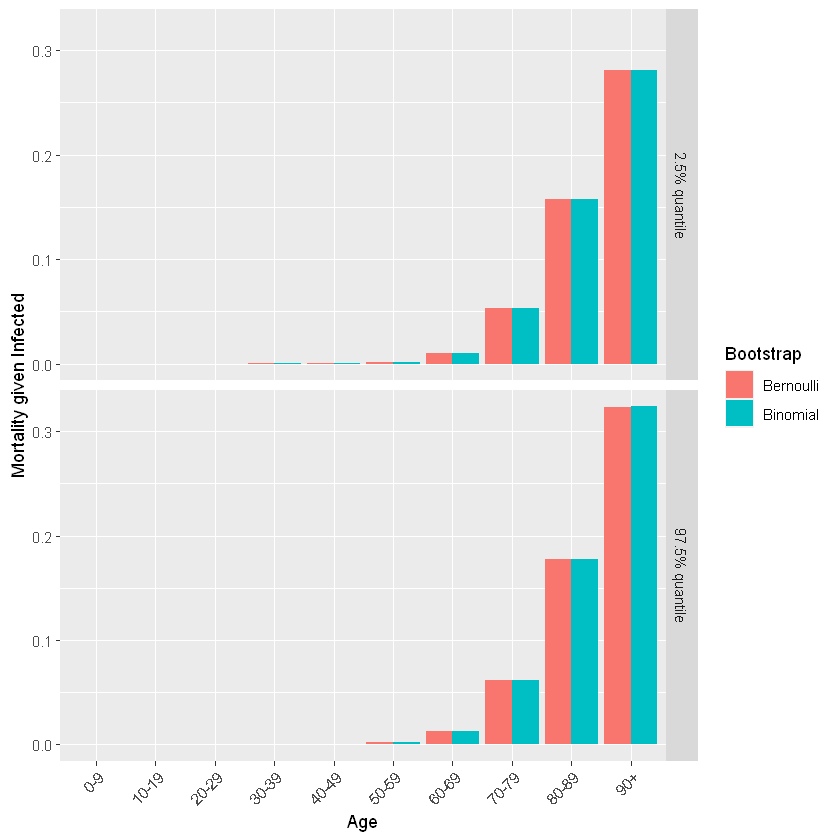

In [15]:
Quantiles %>% gather("Quantile","Value", -Age,-Bootstrap) %>% 
  ggplot(aes(x = Age, y = Value, fill = Bootstrap)) + 
  geom_bar(stat = "identity",position=position_dodge()) + 
  facet_grid(vars(Quantile)) +
  theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
  ylab("Mortality given Infected")

# Logistisk regression på en kategorisk variabel

Vi vil undersøge, hvad sandsynligheden er for at man dør givet en specifik alder.
Dog kan der opstå et problem, da modellen oftest operere på kontinuerete forklarende variable.

Da kan det være nødvendigt at undersøge, hvorvidt det har nogen betydning i vores tilfælde. Vi har nemlig en variabel der originalt er kontinuert - altså variablen alder, men denne variabel er gjort diskret ved at afrunde alderen til kun at indeholde år. Efterfølgende er alderen yderligere opdelt kategorisk, så der er tale om en aldersgruppe.

Har dette nogen signifikant betydning for resultatet?

In [139]:
DKpop <- read_excel("data/folketal.xlsx")
DKpop %<>% mutate(P = total/sum(total))
head(DKpop)

age,total,male,female,P
0,61191,31303,29888,0.01047783
1,61663,31758,29905,0.01055865
2,61967,31909,30058,0.01061071
3,62185,31852,30333,0.01064803
4,62844,32402,30442,0.01076088
5,59740,30627,29113,0.01022937


In [92]:
#inverse_logit = function(p){
#  exp(p)/(1+exp(p))
#}

In [122]:
Sampler = function(n, beta_0, beta_1, uniform_displace = T){
    X = with(DKpop, sample(age, n, replace = T, prob = P))
    if (uniform_displace){
        X = X + runif(n,0,1)
    }
    P_X = ilogit(beta_0 + beta_1*X)
    Y = rbernoulli(n,P_X)
    return(tibble(age = X,dead = Y))
}

In [127]:
beta_0 = -9
beta_1 = 0.1

Sampled_Data = Sampler(1000,beta_0,beta_1)
head(Sampled_Data, 10)

age,dead
35.45491,FALSE
15.90395,FALSE
85.24125,FALSE
37.32474,FALSE
14.60384,FALSE
58.71595,FALSE
46.83278,FALSE
50.14032,FALSE
25.87285,FALSE
11.18786,FALSE


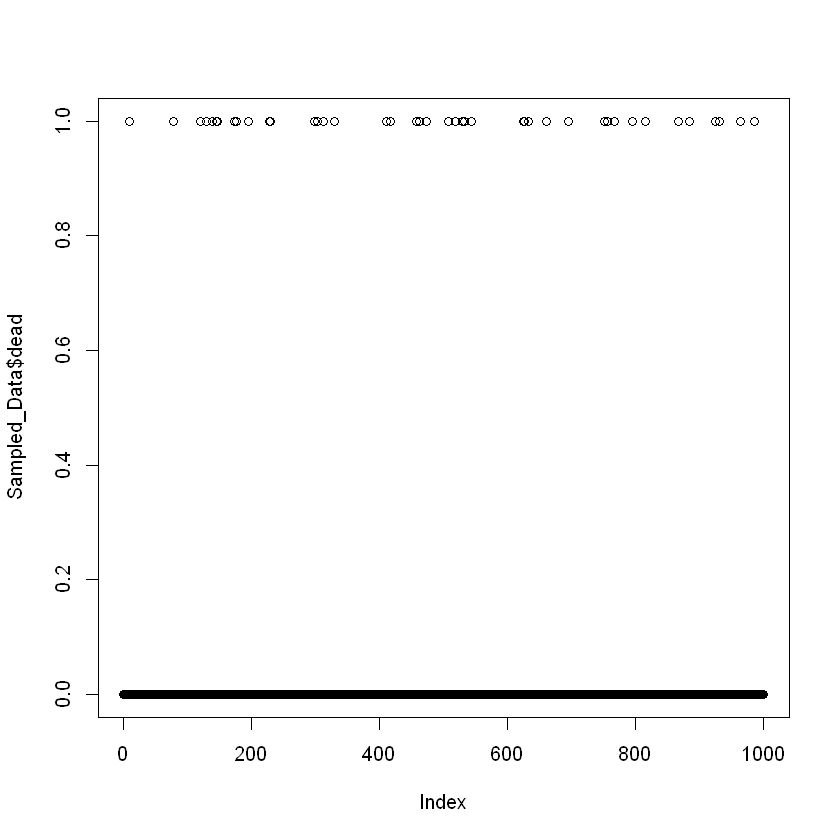

In [95]:
plot(Sampled_Data$dead)

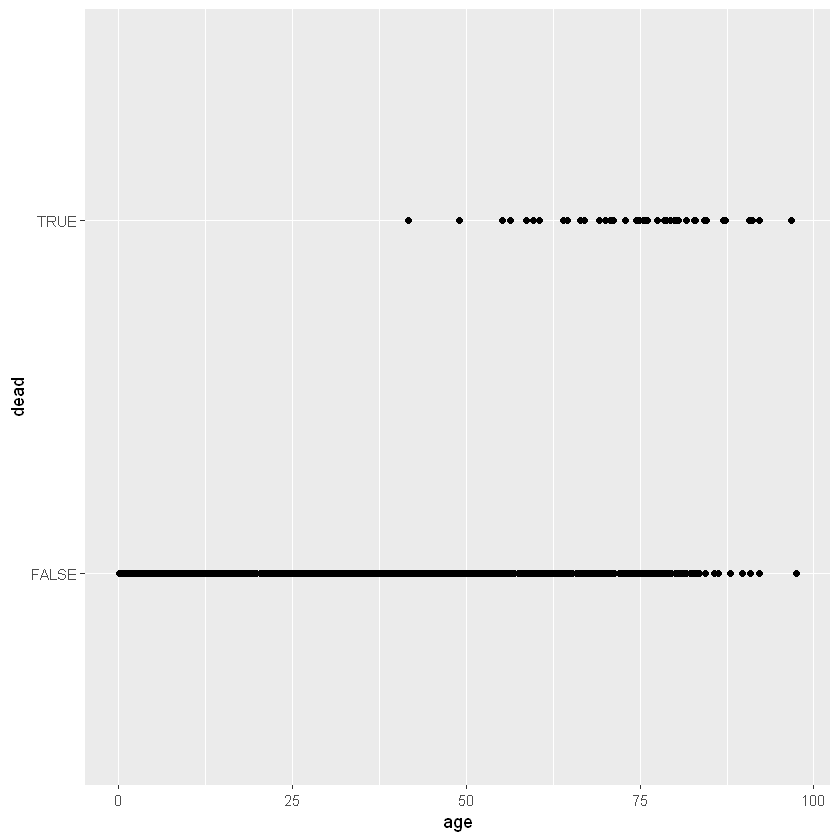

In [96]:
Sampled_Data %>% 
  ggplot(aes(x = age, y = dead)) + geom_point()

In [143]:
Logit_Curve = tibble(age = 0:120, `P(Dead|Age)` = ilogit(beta_0 + beta_1*0:120)+1)
head(Logit_Curve)
tail(Logit_Curve)

age,P(Dead|Age)
0,1.000123
1,1.000136
2,1.000151
3,1.000167
4,1.000184
5,1.000203


age,P(Dead|Age)
115,1.924142
116,1.930862
117,1.937027
118,1.942676
119,1.947846
120,1.952574


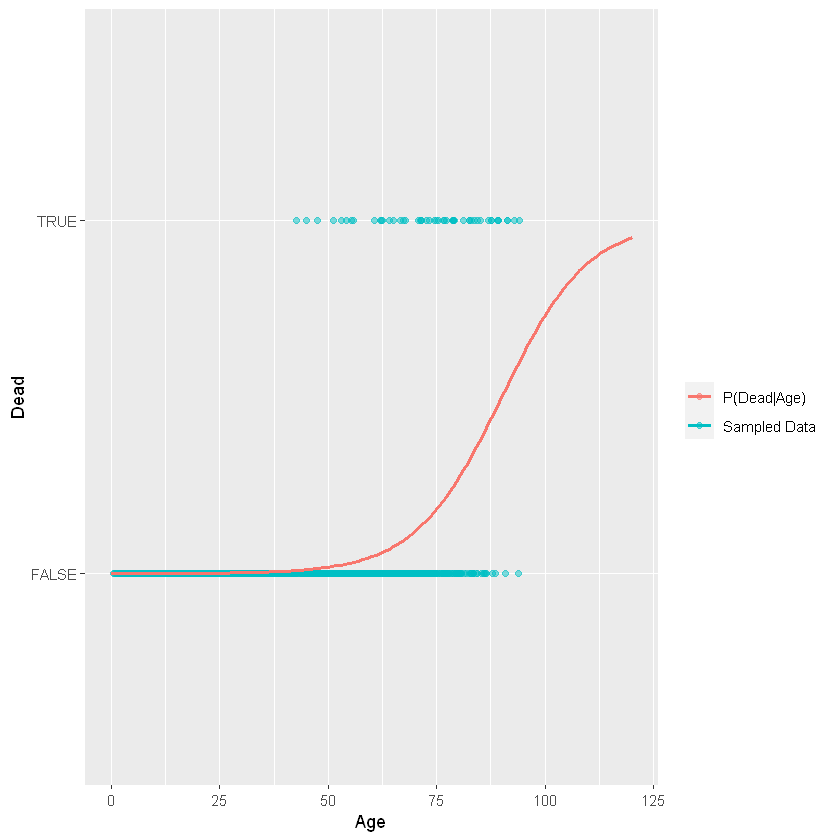

In [158]:
Sampled_Data %>%
    ggplot(aes(x = age, y = dead, color = "Sampled Data")) + geom_point(alpha = 0.5) + 
    geom_line(data = Logit_Curve, aes(x = age, y = `P(Dead|Age)`, color = "P(Dead|Age)"), size = .87, inherit.aes = F) + 
    xlab("Age") + ylab("Dead") + labs(color = "")

In [160]:
Sampled_Data %<>% mutate(age_truncated = floor(age/10)*10)
head(Sampled_Data)

age,dead,age_truncated
35.45491,FALSE,30
15.90395,FALSE,10
85.24125,FALSE,80
37.32474,FALSE,30
14.60384,FALSE,10
58.71595,FALSE,50


In [161]:
glm.main <- glm(dead ~ age, family = "binomial", data = Sampled_Data)
summary(glm.main)


Call:
glm(formula = dead ~ age, family = "binomial", data = Sampled_Data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.32638  -0.28442  -0.12285  -0.04663   3.06087  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.84152    0.88700  -9.968  < 2e-16 ***
age          0.09781    0.01226   7.976 1.51e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 402.90  on 999  degrees of freedom
Residual deviance: 285.64  on 998  degrees of freedom
AIC: 289.64

Number of Fisher Scoring iterations: 7


In [162]:
glm.truncated <- glm(dead ~ age_truncated, family = "binomial", data = Sampled_Data)
summary(glm.truncated)


Call:
glm(formula = dead ~ age_truncated, family = "binomial", data = Sampled_Data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.35069  -0.24891  -0.15442  -0.05902   2.97832  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -8.28079    0.81604 -10.147  < 2e-16 ***
age_truncated  0.09644    0.01209   7.978 1.49e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 402.90  on 999  degrees of freedom
Residual deviance: 286.28  on 998  degrees of freedom
AIC: 290.28

Number of Fisher Scoring iterations: 7


In [164]:
`P(Age)` = DKpop$P
`P(Dead|Age)` = ilogit(beta_0 + beta_1*DKpop$age)
(`P(Dead)` = sum(`P(Dead|Age)`*`P(Age)`))

[1] 0.0501071

# TEST KODE

In [63]:
temp_df <- df %>% 
  filter(age != "Alle")
unfolded_data = pmap_dfr(temp_df, 
                      function(interval, tot_deaths, infected, infected_male,infected_fem, male_deaths, female_deaths,...) {
                           data.frame(age = interval,
                                      dead = c(rep(1, tot_deaths), rep(0, infected - tot_deaths)),
                                      gender = c(rep("Male", male_deaths),
                                                rep("Female", female_deaths),
                                                rep("Male",infected_male-male_deaths),
                                                rep("Female",infected_fem-female_deaths)))
                                     
                      }
)

In [64]:
nrow(unfolded_data)

[1] 221842

In [65]:
head(unfolded_data, 10)

age,dead,gender
1,1,Male
1,0,Male
1,0,Male
1,0,Male
1,0,Male
1,0,Male
1,0,Male
1,0,Male
1,0,Male
1,0,Male
